<a href="https://colab.research.google.com/github/rayannoyma/Projeto-Shark-Attacks/blob/editado/projeto_shark_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Shark Attack

Diretrizes:

Como começar

- Crie seu repositório github, não se esqueça de confirmar com antecedência e com frequência.
- Baixe o conjunto de dados e importe-o para o Python.
- Examine os dados e tente entender o significado dos campos antes de prosseguir com a limpeza e manipulação dos dados.
- Use dicas rápidas sobre análise exploratória de dados, como o método "descrever" e gráficos básicos, para explorar os dados e identificar quaisquer problemas que precisem ser resolvidos.
- Decida uma hipótese (ou hipóteses) para orientar seus esforços de limpeza. Apresente a análise de forma clara e coerente para apoiar os resultados. Por exemplo: "Os tubarões atacam mais pessoas jovens do que as mais velhas", "A maneira mais fácil de ser atacado por um tubarão é surfando", "Os tubarões atacam mais pessoas nos EUA do que na Islândia", etc.
- Aplique pelo menos cinco técnicas de limpeza de dados, como manipulação de valores nulos, descarte de colunas, remoção de dados duplicados, manipulação de strings, formatação de dados etc., para preparar o conjunto de dados para análise.
- Depois que os dados forem limpos, analise-os para validar suas hipóteses e tirar conclusões sobre os dados. Use a análise estatística básica e crie gráficos para apoiar suas descobertas.
- Crie uma apresentação visualmente atraente com o mínimo de texto para mostrar que comunique efetivamente suas ideias e conclusões às partes interessadas, criando uma narrativa convincente que destaca a importância de sua análise.
- Organize seu código! Para melhorar a organização e a legibilidade do seu código, crie arquivos .py separados para funções relacionadas e use vários notebooks Jupyter, se necessário. Use uma "função de limpeza principal" em Cleaning.py (ou similar) que chame todas as funções de limpeza menores em uma ordem específica para executar todo o processo de limpeza de uma só vez. Seu código deve ser fácil de ler e entender para seus colegas (e futuros recrutadores).

In [340]:
import pandas as pd
import numpy as np

https://www.amazon.com/Sharkbanz-Magnetic-Shark-Repellent-Band/dp/B01N7CSP0S?crid=2C75676AC8FD5&keywords=shark%2Brepellent&qid=1668271261&sprefix=shark%2Brep%2Caps%2C223&sr=8-1-spons&th=1&linkCode=li3&tag=honestsurf-20&linkId=519c5209ede246edcce82576d5c19b03&language=en_US&ref_=as_li_ss_il

In [341]:
#criando um df
shark_attacks = pd.read_excel('GSAF5.xls')

In [342]:
#limpando os espaços dos nomes das colunas no df
shark_attacks = shark_attacks.rename(columns=lambda x: x.strip().replace(" ", ""))

In [ ]:
shark_attacks.columns

In [344]:
#limpando os espaços vazios na coluna 'Year'
shark_attacks = shark_attacks.dropna(subset=['Year'])

In [365]:
#transfomando em inteiros os valores de 'Year'
shark_attacks['Year'] = shark_attacks['Year'].astype(int)

In [346]:
#substituindo os elementos que tinham espaços sobrando na coluna 'Sex'
shark_attacks['Sex'] = shark_attacks['Sex'].replace({'M ': 'M'})

In [376]:
#substituindo os nomes repetidos da coluna 'Location'
shark_attacks['Location'] = shark_attacks['Location'].replace({'Daytona Beach Shores, Volusia County' : 'Daytona Beach, Volusia County', 'Ponce Inlet, New Smyrna Beach, Volusia County' : 'New Smyrna Beach, Volusia County', 'Ponce Inlet, Volusia County':'New Smyrna Beach, Volusia County' })

In [377]:
# DataFrame com informações relevantes para o projeto
new_df = shark_attacks.loc[:,['Year','Location','Sex']]

In [378]:
# Recorte dos ataques a partir dos anos 2000
new_df1 = shark_attacks.loc[shark_attacks['Year'] >= 2000]

In [379]:
# Criando um novo df com a intersecção do 'Year' e 'Location'
new_df2 = new_df1['Location'].value_counts().head(10).index.tolist()
new_df3 = new_df1[new_df1['Location'].isin(new_df2)]

In [382]:
# Recorte dos 10 lugares com mais ataques
new_df2

['New Smyrna Beach, Volusia County',
 'Daytona Beach, Volusia County',
 'Cocoa Beach, Brevard  County',
 'Myrtle Beach, Horry County',
 'Melbourne Beach, Brevard County',
 'Jacksonville Beach, Duval County',
 'Isle of Palms, Charleston County',
 'Quy Nhon ',
 'Vero Beach, Indian River County',
 'Florida Keys, Monroe County']

In [ ]:
# Novo dataframe com dos Lugares de mais ataques no periodo recortado
new_df3

In [384]:
# Indice de genero nos ataques  em relação aperiodo
new_df3['Sex'].value_counts()

M    222
F     61
Name: Sex, dtype: int64

In [385]:
new_df3['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [386]:
# Dataframe Final
df_final = new_df3.loc[:,['Year','Location','Sex']].reset_index()
df_final = df_final.groupby(['Year','Location','Sex'],as_index=False).count()

In [387]:
df_final

,Year,Location,Sex,index
0,2000,"Daytona Beach, Volusia County",F,1
1,2000,"Daytona Beach, Volusia County",M,1
2,2000,"New Smyrna Beach, Volusia County",M,5
3,2000,"Vero Beach, Indian River County",M,1
4,2001,"Myrtle Beach, Horry County",F,1
...,...,...,...,...
109,2022,"Daytona Beach, Volusia County",M,1
110,2022,"Florida Keys, Monroe County",M,1
111,2022,"Myrtle Beach, Horry County",F,2
112,2022,"Myrtle Beach, Horry County",M,1


<ipython-input-375-7bd487e76881>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='Year', ylabel='index'>

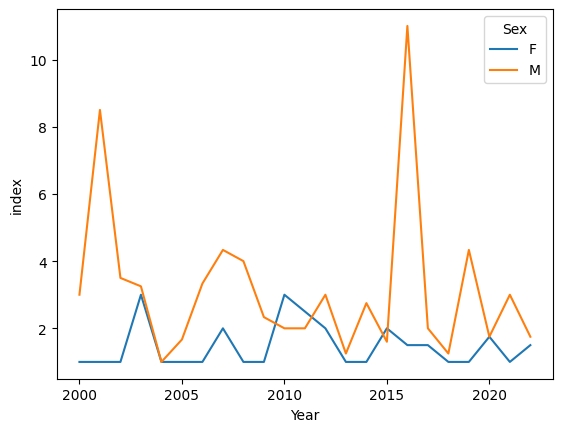

In [375]:
#criando um grafico com as informações obtidas
import seaborn as sns

sns.lineplot(df_final_agrupado, x = 'Year', y = 'index', hue='Sex', ci=None)
